# Initialization

In [1]:
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import linear_model
from sklearn import ensemble
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
import my_utils


In [2]:
train=pd.read_csv('../data/data.csv.zip', compression='zip', index_col=1)
train=train.drop(columns=['Unnamed: 0'])

# Data Cleaning

In [3]:
train.columns = my_utils.clean_column_names(train)
train = my_utils.preprocess_columns(train)
train.columns

Index(['name', 'age', 'nationality', 'overall', 'potential', 'club', 'value',
       'wage', 'special', 'preferred_foot', 'international_reputation',
       'weak_foot', 'skill_moves', 'work_rate', 'body_type', 'real_face',
       'position', 'jersey_number', 'joined', 'loaned_from',
       'contract_valid_until', 'height', 'weight', 'ls', 'st', 'rs', 'lw',
       'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm',
       'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb',
       'crossing', 'finishing', 'headingaccuracy', 'shortpassing', 'volleys',
       'dribbling', 'curve', 'fkaccuracy', 'longpassing', 'ballcontrol',
       'acceleration', 'sprintspeed', 'agility', 'reactions', 'balance',
       'shotpower', 'jumping', 'stamina', 'strength', 'longshots',
       'aggression', 'interceptions', 'positioning', 'vision', 'penalties',
       'composure', 'marking', 'standingtackle', 'slidingtackle', 'gkdiving',
       'gkhandling', 'gkkicking', 'gk

In [4]:
train.dropna(subset=['aggression', 'overall', 'age', 'potential', 
                    'international_reputation',
                    'weak_foot', 'skill_moves', 'crossing', 'finishing', 'headingaccuracy', 
                    'shortpassing', 'volleys', 'dribbling', 'curve', 'fkaccuracy', 'longpassing',
                    'ballcontrol', 'acceleration', 'sprintspeed',
                    'agility', 'reactions', 'balance', 'shotpower', 'jumping', 'stamina', 
                    'strength',
                    'longshots', 'aggression', 'interceptions', 'positioning', 'vision', 
                    'penalties',
                    'composure', 'marking', 'standingtackle', 'slidingtackle', 'gkdiving', 
                    'gkhandling', 'gkkicking', 'gkpositioning', 'gkreflexes'], 
             inplace=True)


# Modelling

## Predicting the overall rating of a player

Excluding value and wage from the feature set.
Its a chicken and egg problem.  Does the overall rating dictate wage and value or wage and value dictate the rating.
I think the overall rating define the wage and value.

In [5]:
X = train[['aggression', 'age', 'potential', 'international_reputation',
            'weak_foot', 'skill_moves', 'crossing', 'finishing', 'headingaccuracy', 
            'shortpassing', 'volleys', 'dribbling', 'curve', 'fkaccuracy', 'longpassing',
            'ballcontrol', 'acceleration', 'sprintspeed',
            'agility', 'reactions', 'balance', 'shotpower', 'jumping', 'stamina', 'strength',
            'longshots', 'aggression', 'interceptions', 'positioning', 'vision', 'penalties',
            'composure', 'marking', 'standingtackle', 'slidingtackle', 'gkdiving', 
            'gkhandling', 'gkkicking', 'gkpositioning', 'gkreflexes']]
y = train.overall

In [6]:
models = []
models.append(('LR', linear_model.LinearRegression()))
## models.append(('SGD', linear_model.SGDRegressor(max_iter=1000, tol=1e-3)))
models.append(('BR', linear_model.BayesianRidge(n_iter=1000)))
models.append(('Huber', linear_model.HuberRegressor(alpha=0.0001, epsilon=1.35, fit_intercept=True, 
                                                    max_iter=100, tol=1e-05, warm_start=False)))
models.append(('LarsCV', linear_model.LarsCV(max_iter=1000, eps=1.35, cv=10)))
models.append(('LassoCV', linear_model.LassoCV(max_iter=1000, cv=5)))
#models.append(('LLCV', linear_model.LassoLarsCV(max_iter=1000, cv=5, eps=10)))
models.append(('RF', ensemble.RandomForestRegressor(n_estimators=10)))

## models.append(('ARD', linear_model.ARDRegression()))


In [7]:
nfolds=10
results = []
for name, model in models:
    kf = KFold(n_splits=nfolds, random_state=17)
    model.fit(X, y)
    y_pred = model.predict(X)
    score = cross_val_score(model, X, y, cv=kf)
    print('Model {0} score: {1:.4f} and std dev: {2:.4f}'.format(name, score.mean(), score.std()))
    # The coefficients
    # print('Coefficients: \n', model.coef_)
    # The mean squared error
    print("Mean squared error: %.4f"
          % mean_squared_error(y, y_pred))
    # Explained variance score: 1 is perfect prediction
    print('Variance score: %.4f' % r2_score(y, y_pred))
    # Regression score 
    # print('Regression score: %.4f' % model.score(X, y))
    results.append((name, score, r2_score(y, y_pred)))
    try:
        i
    except NameError:
        i=score.mean()-1        
    if score.mean() > i :
        imodel=model
        i=score.mean()

print("Done")


Model LR score: -5.0360 and std dev: 3.5004
Mean squared error: 3.4654
Variance score: 0.9275
Model BR score: -5.0340 and std dev: 3.5073
Mean squared error: 3.4656
Variance score: 0.9275
Model Huber score: -5.6204 and std dev: 3.6732
Mean squared error: 4.1712
Variance score: 0.9128
Model LarsCV score: -8.0375 and std dev: 2.8204
Mean squared error: 7.5471
Variance score: 0.8421
Model LassoCV score: -5.0982 and std dev: 3.6074
Mean squared error: 3.5064
Variance score: 0.9267
Model RF score: -3.3853 and std dev: 1.3277
Mean squared error: 0.2554
Variance score: 0.9947
Done


# Results

In [8]:
results=np.array(results)

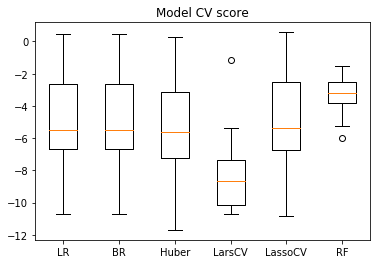

In [9]:
fig, ax = plt.subplots()
ax.boxplot(results[:,1])
ax.set_xticklabels(results[:,0])
ax.set_title('Model CV score')
plt.show()

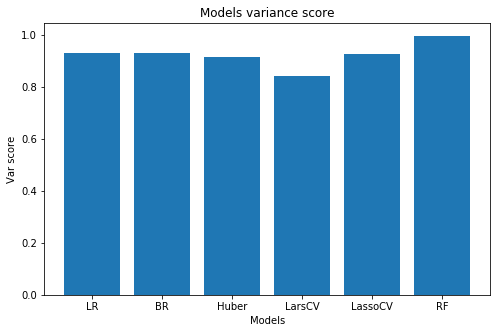

In [10]:
plt.figure(figsize=(8, 5))
plt.bar(results[:,0], results[:,2])
plt.xlabel('Models')
plt.ylabel('Var score')
plt.title('Models variance score')
plt.show()

Best performing model RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)


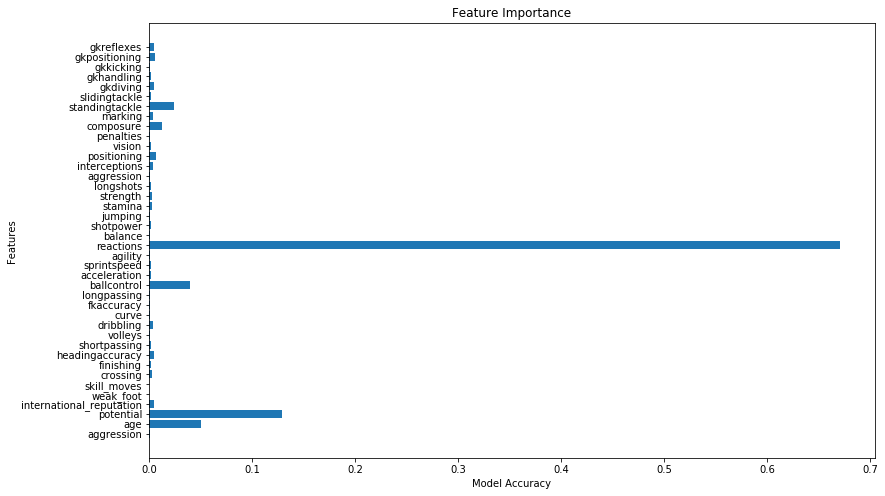

In [11]:
# fi = imodel.fit(X, y).coef_
fi = imodel.fit(X, y).feature_importances_
pos = np.arange(len(X.columns))
print("Best performing model", imodel)
plt.figure(figsize=(13, 8))
plt.barh(pos, fi)
plt.title("Feature Importance")
plt.xlabel("Model Accuracy")
plt.ylabel("Features")
plt.yticks(pos, (list(X)))
plt.show()
